In [1]:
from src.sampler import mcmc_sampler
from src.utility_functions import simulate_data
import numpy as np
import matplotlib.pyplot as plt

## One Breakpoint

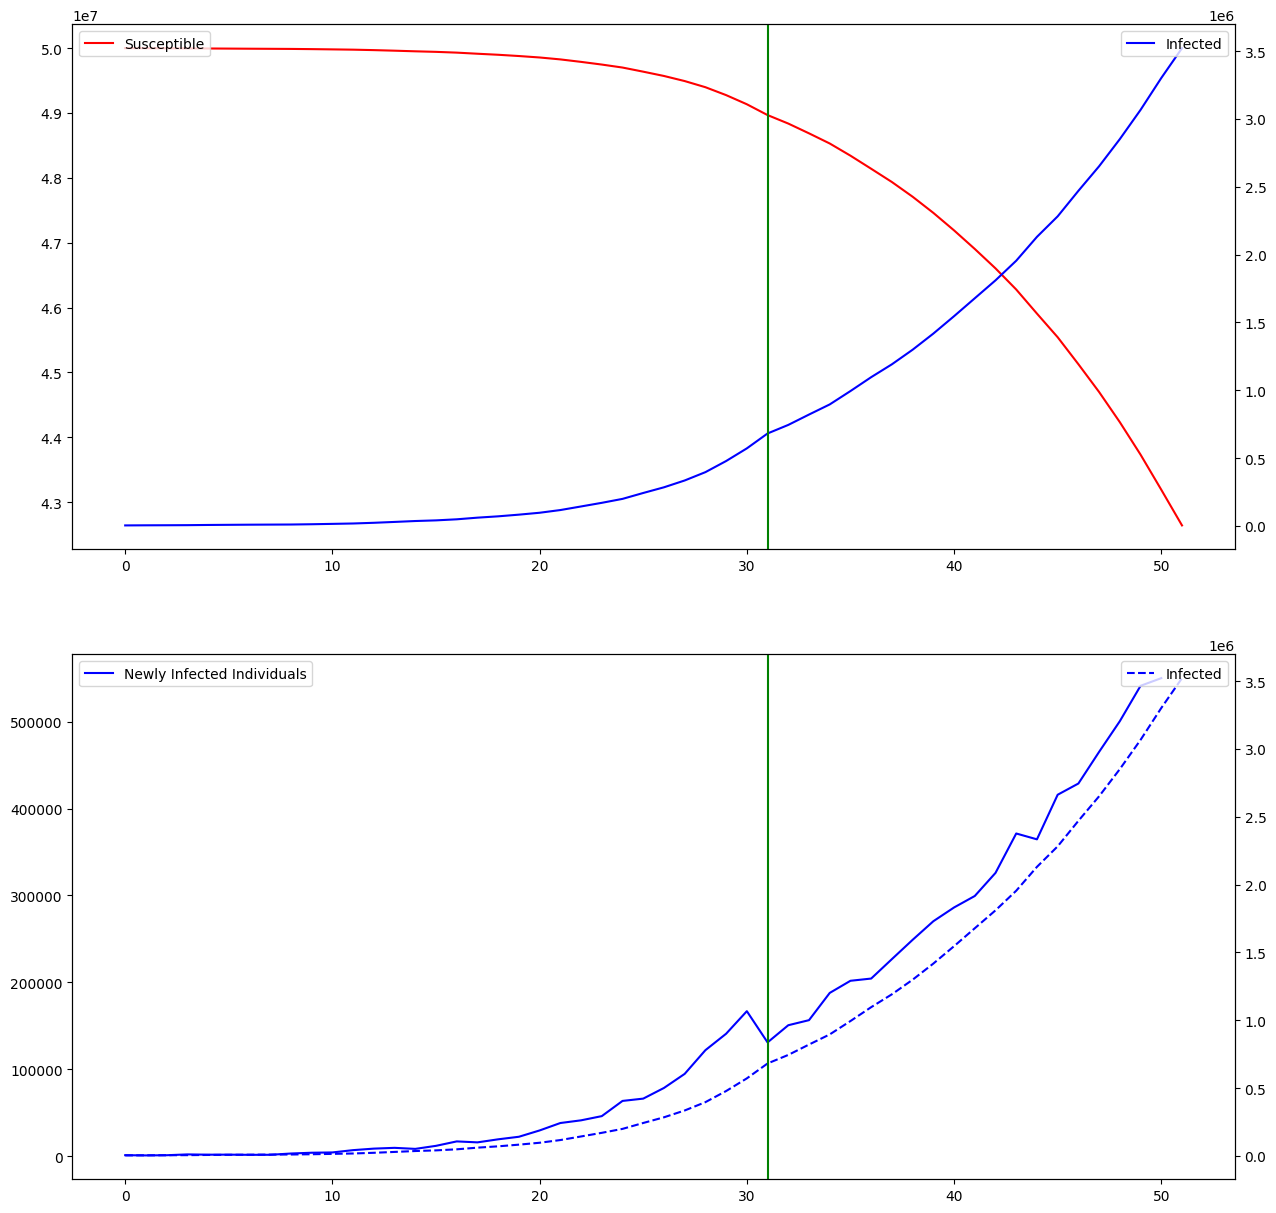

In [2]:
# Simulate the data.
T = 50
lam = np.array([0.3,0.2])
t = np.array([31])
s_0 = 50000000
i_0 = 4000
P = s_0 + i_0
p = 0.1
phi = 0.995
s, i = simulate_data(T, lam, t, s_0, i_0, p, phi)

# Plot the series.
fig, axs = plt.subplots(nrows = 2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax1_left = axs[0]
ax2_left = axs[1]
ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx()
ax1_left.plot(s, color='red', label="Susceptible")
ax1_right.plot(i, color='blue', label="Infected")
ax1_left.legend(loc=2)
ax1_right.legend(loc=1)
delta_i = -np.diff(s)
ax2_left.plot(delta_i, color="blue", label="Newly Infected Individuals")
ax2_right.plot(i, color="blue", linestyle="dashed", label="Infected")
ax2_left.legend(loc=2)
ax2_right.legend(loc=1)

# Display obtained breakpoints on plot.
for breakpoint in t:
  ax1_right.axvline(breakpoint, color="green")
  ax2_right.axvline(breakpoint, color="green")
plt.show()

In [3]:
# Define parameters
d = lam.shape[0]
sigma = 0.01
alpha = np.repeat(2, d)
beta = np.repeat(0.1, d)
a = 1
b = 1
M = 3
phi = 0.995

# Run MCMC
n_iterations = 10000
burnin = 1000
p_mcmc, lam_mcmc, t_mcmc, lam_ar, t_ar = mcmc_sampler(s, i, d, P, n_iterations, burnin, M, sigma, alpha, beta, a, b, phi)

# Print the results.
print(f"Acceptance rate for lambda: {lam_ar}")
print(f"Acceptance rate for t: {t_ar}")
print(f"True lambda: {lam} Estimated lambda: {np.average(lam_mcmc, axis=1)}")
print(f"True t: {t} Estimated t: {np.average(t_mcmc, axis=1)}")
print(f"True p: {p} Estimated p: {np.average(p_mcmc)}")

Acceptance rate for lambda: 0.2901
Acceptance rate for t: 0.1502
True lambda: [0.3 0.2] Estimated lambda: [0.29424435 0.1983494 ]
True t: [31] Estimated t: [31.]
True p: 0.1 Estimated p: 0.09991849283376765


## Two Breakpoints

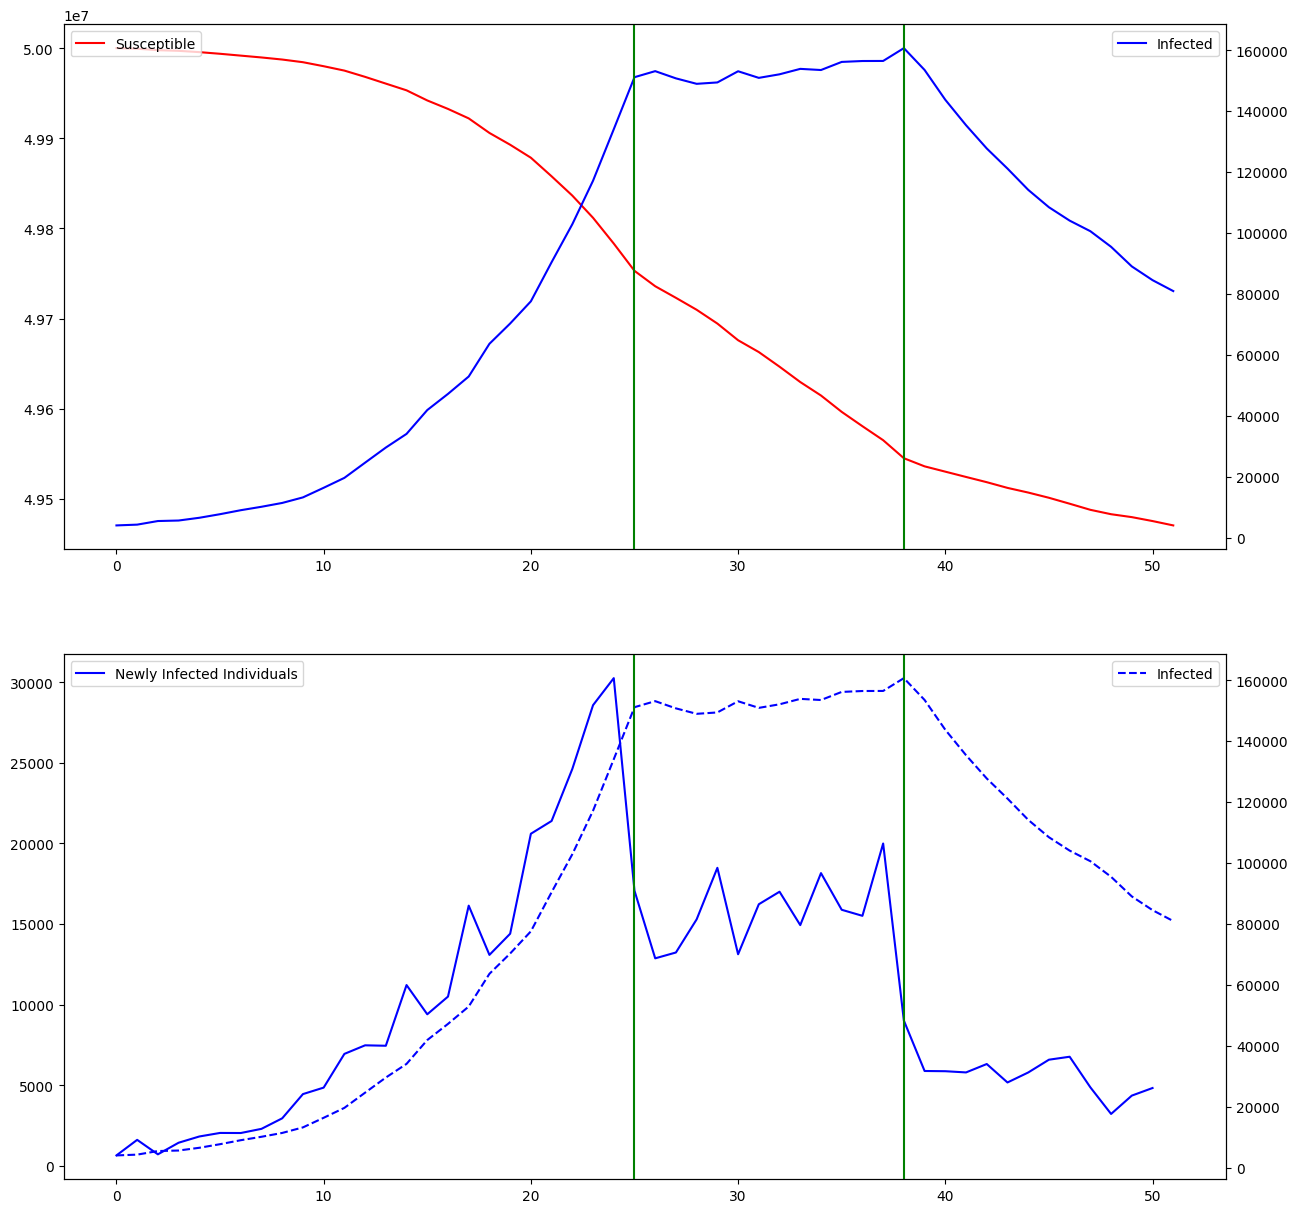

In [4]:
# Simulate the data.
T = 50
lam = np.array([0.25, 0.1, 0.05])
t = np.array([25, 38])
s_0 = 50000000
i_0 = 4000
P = s_0 + i_0
p = 0.1
phi = 0.995
s, i = simulate_data(T, lam, t, s_0, i_0, p, phi)

# Plot the series.
fig, axs = plt.subplots(nrows=2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax1_left = axs[0]
ax2_left = axs[1]
ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx()
ax1_left.plot(s, color='red', label="Susceptible")
ax1_right.plot(i, color='blue',label="Infected")
ax1_left.legend(loc=2)
ax1_right.legend(loc=1)
delta_i = -np.diff(s)
ax2_left.plot(delta_i, color="blue", label="Newly Infected Individuals")
ax2_right.plot(i, color="blue", linestyle="dashed", label="Infected")
ax2_left.legend(loc=2)
ax2_right.legend(loc=1)

# Display obtained breakpoints on plot.
for breakpoint in t:
  ax1_right.axvline(breakpoint, color="green")
  ax2_right.axvline(breakpoint, color="green")
plt.show()

In [5]:
# Define parameters
d = lam.shape[0]
sigma = 0.01
alpha = np.repeat(2, d)
beta = np.repeat(0.1, d)
a = 1
b = 1
M = 3
phi = 0.995

# Run MCMC
n_iterations = 10000
burnin = 1000
p_mcmc, lam_mcmc, t_mcmc, lam_ar, t_ar = mcmc_sampler(s, i, d, P, n_iterations, burnin, M, sigma, alpha, beta, a, b, phi)

# Print the results.
print(f"Acceptance rate for lambda: {lam_ar}")
print(f"Acceptance rate for t: {t_ar}")
print(f"True lambda: {lam} Estimated lambda: {np.average(lam_mcmc,axis = 1)}")
print(f"True t: {t} Estimated t: {np.average(t_mcmc,axis = 1)}")
print(f"True p: {p} Estimated p: {np.average(p_mcmc)}")

Acceptance rate for lambda: 0.42473333333333335
Acceptance rate for t: 0.14315
True lambda: [0.25 0.1  0.05] Estimated lambda: [0.2478728  0.10532648 0.04921653]
True t: [25 38] Estimated t: [25. 38.]
True p: 0.1 Estimated p: 0.10001788048369231
